# Multiple Linear Regression (3D visualization)📈

Multiple Linear Regression (MLR) is an extension of simple linear regression, where multiple independent variables are used to predict the dependent variable. The goal of this repository is to implement MLR in Python using the Scikit-learn library (a machine learning library in Python used to implement multiple linear regression models and to read, preprocess, and split data). 

**✏️About Dataset.**

The data used in this study were obtained from the database of Eurostat, which is the statistical office that collects data for the European Union. The analyzed data includes the following European countries (27 countries): Belgium, Bulgaria, Czech Republic, Denmark, Germany, Estonia, Ireland, Greece, Spain, France, Croatia, Italy, Cyprus, Latvia, Lithuania, Luxembourg, Hungary, Malta, Netherlands, Austria, Poland, Portugal, Romania, Slovenia, Slovakia, Finland and Sweden. We note that the study proposes a more varied approach, taking into account different type of countries (developed and under developed), the observed period being from 2011 to 2021.This aspect leads to a large variety of values for the considered variables.

The macroeconomic indicators analyzed in this study are:

- EP (Energy productivity)
- EE (Energy efficiency)
- EM (Employment)

We are interested in understanding the relationship between the variables involved in the study in order to have a broader view of the described economic context. In this repository we will summarize the aspects regarding 3D plotting for MLR without pointing out in detail the assumptions that must be fulfilled for multiple linear regression.

**✏️Import the libraries.**

In [85]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from mpl_toolkits.mplot3d import Axes3D
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

**✏️Data.**

The values of the macroeconomic indicators for each country were obtained as the arithmetic mean of the values of these variables in the interval 2011-2021 and were previously processed from the files EP.xls, EE.xls and EM.xls.

$\color{red}{\text{Hypothesis: Influence of EP and EE on EM.}}$

In [86]:
l_em=[4553.572727272727, 2975.245454545455, 4963.6, 2529.481818181818, 38550.72727272727, 601.1, 1998.8272727272727, 3674.6, 18226.081818181818, 25855.763636363637, 1570.390909090909, 22081.690909090914, 376.0636363636364, 851.8363636363636, 1283.7636363636361, 258.70000000000005, 4166.772727272727, 205.93636363636367, 7819.1454545454535, 3980.30909090909, 15722.118181818181, 4399.681818181817, 8125.745454545454, 917.2272727272727, 2423.3363636363642, 2354.0000000000005, 4597.081818181819]
l_ee=[47.32363636363636, 17.861818181818183, 39.805454545454545, 17.11272727272727, 290.7963636363636, 5.238181818181819, 13.941818181818183, 23.096363636363638, 118.07181818181817, 237.95181818181817, 8.108181818181817, 148.18818181818182, 2.397272727272727, 4.404545454545454, 6.085454545454545, 4.282727272727272, 23.746363636363636, 0.83, 63.98090909090909, 31.684545454545457, 96.47818181818182, 21.34090909090909, 31.799090909090907, 6.568181818181819, 15.641818181818179, 32.158181818181816, 45.55363636363637]
l_ep=[6.3090909090909095, 2.2836363636363632, 4.1445454545454545, 14.697272727272729, 8.975454545454546, 3.294545454545455, 16.704545454545453, 7.15, 8.30090909090909, 8.334545454545456, 5.490909090909091, 9.93090909090909, 7.369999999999999, 4.600909090909091, 4.62, 11.236363636363636, 4.457272727272727, 3.6254545454545455, 7.624545454545455, 9.390909090909092, 4.300909090909091, 7.479090909090909, 4.7309090909090905, 5.742727272727273, 4.713636363636364, 5.741818181818181, 8.284545454545453]

In [87]:
data={

    'EM':l_em,
    'EE':l_ee,
    'EP':l_ep
    }
df=pd.DataFrame(data,columns=['EM','EE','EP'])

In [88]:
df

,EM,EE,EP
0,4553.572727,47.323636,6.309091
1,2975.245455,17.861818,2.283636
2,4963.600000,39.805455,4.144545
3,2529.481818,17.112727,14.697273
4,38550.727273,290.796364,8.975455
5,601.100000,5.238182,3.294545
6,1998.827273,13.941818,16.704545
7,3674.600000,23.096364,7.150000
8,18226.081818,118.071818,8.300909
9,25855.763636,237.951818,8.334545


- **Independent and Dependent Variables.**

In [89]:
y_var= df['EM'] #dependentt variable
x_var= df.drop(['EM'], axis=1)#independent variable

- **Scalling Data.**

In [90]:
x_scaled = preprocessing.scale(x_var)
x_scaled = pd.DataFrame(x_scaled, columns=x_var.columns) 
y_scaled = preprocessing.scale(y_var)
y_scaled = pd.DataFrame(y_scaled, columns=['EM'])

In [91]:
x_scaled

,EE,EP
0,-0.040282,-0.215955
1,-0.458004,-1.439071
2,-0.146878,-0.873642
3,-0.468625,2.332754
4,3.411776,0.594207
5,-0.636988,-1.131911
6,-0.513584,2.942655
7,-0.383787,0.039551
8,0.962815,0.389249
9,2.662524,0.399470


In [92]:
y_scaled

,EM
0,-0.252025
1,-0.424926
2,-0.207107
3,-0.473758
4,3.472267
5,-0.685007
6,-0.531890
7,-0.348314
8,1.245760
9,2.081570


**✏️Fitting the linear model.**

In [93]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y_scaled,random_state = 0,test_size=0.25)
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [94]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, reg.coef_[0][idx]))

The coefficient for EE is 0.9614228192923964
The coefficient for EP is -0.03815175737325797


In [95]:
intercept = reg.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is 0.004703191267323686


**✏️Evaluation of the model.**

- Evaluation model on training data.

In [96]:
y_pred_train = reg.predict(X_train)
score_train=r2_score(y_train,y_pred_train)

In [97]:
score_train

0.9639730636776686

- Evaluation model on test data.

In [98]:
y_pred_test = reg.predict(X_test)
score_test=r2_score(y_test,y_pred_test)

In [99]:
score_test

0.9605792716971316

**✏️3D visualization of Multiple Regression.**

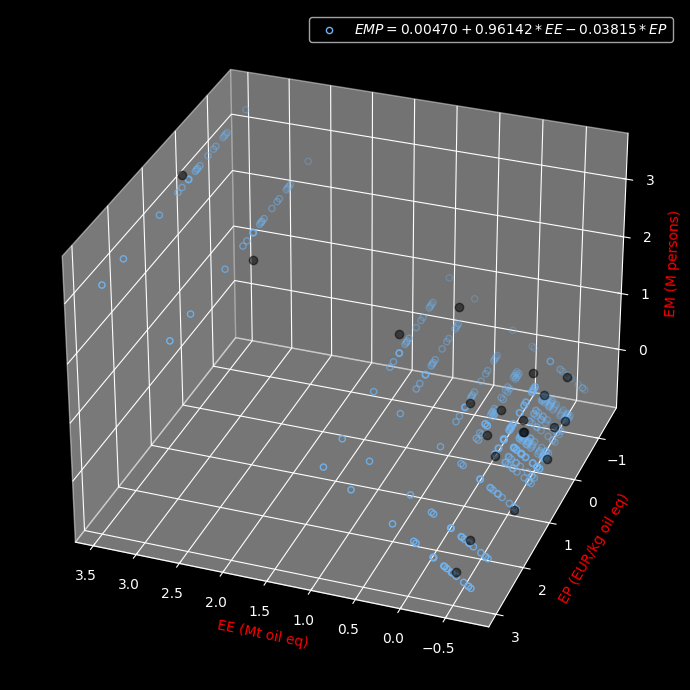

In [100]:
# Preparing the data  
independent = X_train[['EE','EP']].values.reshape(-1,2)  
dependent = y_train['EM']  
  
# Creating a variable for each dimension  
x = independent[:, 0]  
y = independent[:, 1]  
z = dependent  
x_ee_pred = np.linspace(np.array(x).min(),np.array(x).max(),100)
x_ep_pred = np.linspace(np.array(y).min(),np.array(y).max(),100)
xx_eepred, xx_eppred = np.meshgrid(x,y)
model_viz = np.array([xx_eepred.flatten(), xx_eppred.flatten()]).T
y_pred = reg.predict(model_viz)

plt.style.use('dark_background')
fig = plt.figure(figsize=(8, 7))
ax = fig.add_subplot(projection='3d')
ax.plot(x,y,z,color='k', zorder=15,linestyle='none',  marker='o', alpha=0.5)
ax.scatter(xx_eepred.flatten(), xx_eppred.flatten(), y_pred, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0',label='$EMP=0.00470+0.96142*EE-0.03815*EP$')
ax.set_xlabel('EE (Mt oil eq)', color='red')
ax.set_ylabel('EP (EUR/kg oil eq) ', color='red')
ax.set_zlabel('EM (M persons) ',color='red')
ax.view_init(elev=30, azim=110)
fig.tight_layout()
plt.legend()
plt.show()